<a href="https://colab.research.google.com/github/thhtruc/NeuralNetwork/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""Train an CNN to classify images from the MNIST database."""
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# number of subprocesses to use for data loading
num_workers = 0
batch_size = 20
valid_size = 0.2

# convert data to torch.FloatTensor
transforms = transforms.ToTensor()
train_data = datasets.MNIST(
    root="train_data_MNIST", train=True, download=True, transform=transforms
)
test_data = datasets.MNIST(
    root="test_data_MNIST", train=False, download=True, transform=transforms
)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting train_data_MNIST/MNIST/raw/train-images-idx3-ubyte.gz to train_data_MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting train_data_MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to train_data_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting train_data_MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to train_data_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting train_data_MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to train_data_MNIST/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting test_data_MNIST/MNIST/raw/train-images-idx3-ubyte.gz to test_data_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting test_data_MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to test_data_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting test_data_MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to test_data_MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting test_data_MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to test_data_MNIST/MNIST/raw



(20, 1, 28, 28)


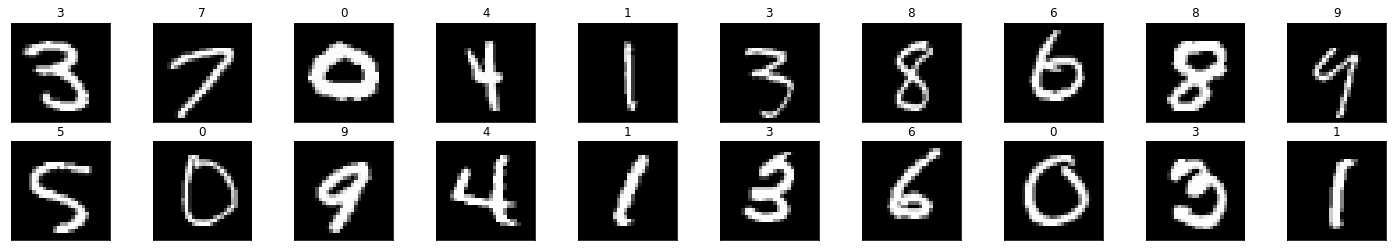

In [3]:
# visualize a batch of training data
import matplotlib.pyplot as plt
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
print(images.shape)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap="gray")
    ax.set_title(str(labels[idx].item()))
    img = np.squeeze(images[1])
plt.show()

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [5]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
import time


tic = time.time()
n_epochs = 10
train_losses, valid_losses = [], []
for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0

    # train the model
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
         
    # validate the model    
    model.eval()
    for data, target in valid_loader:
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()
    train_loss = train_loss/len(train_loader.sampler)
    train_losses.append(train_loss)
    valid_loss = valid_loss/len(valid_loader.sampler)
    valid_losses.append(valid_loss)
        
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
toc = time.time()
print("Time:", 1000000*(toc-tic), "s")

Epoch: 1 	Training Loss: 0.002535 	Validation Loss: 0.002030
Epoch: 2 	Training Loss: 0.002379 	Validation Loss: 0.001887
Epoch: 3 	Training Loss: 0.002248 	Validation Loss: 0.001854
Epoch: 4 	Training Loss: 0.002041 	Validation Loss: 0.001761
Epoch: 5 	Training Loss: 0.001960 	Validation Loss: 0.001726
Epoch: 6 	Training Loss: 0.001830 	Validation Loss: 0.001609
Epoch: 7 	Training Loss: 0.001669 	Validation Loss: 0.001623
Epoch: 8 	Training Loss: 0.001635 	Validation Loss: 0.001653
Epoch: 9 	Training Loss: 0.001590 	Validation Loss: 0.001511
Epoch: 10 	Training Loss: 0.001470 	Validation Loss: 0.001571
Time: 348718089.5805359 s


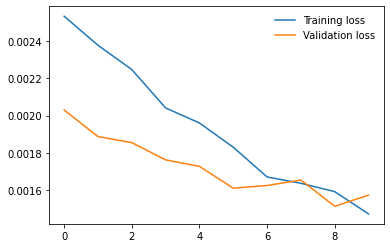

In [9]:
plt.plot(train_losses, label="Training loss")
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

In [7]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
  print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.001763

Test Accuracy of     0: 99% (973/980)
Test Accuracy of     1: 99% (1131/1135)
Test Accuracy of     2: 99% (1023/1032)
Test Accuracy of     3: 99% (1004/1010)
Test Accuracy of     4: 98% (970/982)
Test Accuracy of     5: 97% (870/892)
Test Accuracy of     6: 98% (946/958)
Test Accuracy of     7: 99% (1020/1028)
Test Accuracy of     8: 98% (959/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 98% (9882/10000)
